In [1]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
housing = pd.read_csv('Ames_Housing_Price_Data.csv')
location = pd.read_csv('Ames_Real_Estate_Data.csv')

/Users/klundquist6/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
housing.shape

(2580, 82)

In [4]:
housing

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,759,903205040,952,121000,30,RL,NaN,8854,Pave,NaN,...,40,0,NaN,NaN,NaN,0,5,2009,WD,Normal
2576,760,905402060,1733,139600,20,RL,NaN,13680,Pave,NaN,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
2577,761,909275030,2002,145000,90,RH,82.0,6270,Pave,NaN,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
2578,762,907192040,1842,217500,60,RL,NaN,8826,Pave,NaN,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal


In [5]:
location.describe()

,MapRefNo,GeoRefNo,Tier,Range,SchD_S,TxD_S,MA_Line2,MA_Zip1,MA_Zip2,Rcrd_Yr,...,Fireplaces,PoolArea,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,PA-PostD,NmbrBRs
count,2.221300e+04,2.221300e+04,22213.0,22213.0,22213.000000,22213.000000,0.0,22199.000000,13323.000000,20306.000000,...,17905.000000,17905.000000,17905.000000,17905.000000,17905.000000,2966.000000,2966.000000,2966.000000,0.0,17905.000000
mean,7.790478e+08,7.790386e+08,0.0,0.0,1.448836,4.842570,NaN,52209.281950,5156.050064,2009.224219,...,0.441106,2.454342,1554.508741,1.349968,367.876794,2018.224208,6.347943,223650.251854,NaN,2.594024
std,1.810163e+08,1.810228e+08,0.0,0.0,1.490004,12.407646,NaN,10951.877318,2269.554296,11.107414,...,0.626624,40.356351,816.603875,0.969982,277.456051,1.000826,3.064947,115208.131987,NaN,1.042494
min,5.204000e+08,5.204000e+08,0.0,0.0,1.000000,1.000000,NaN,693.000000,1.000000,1859.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,900.000000,NaN,0.000000
25%,5.341772e+08,5.341772e+08,0.0,0.0,1.000000,1.000000,NaN,50010.000000,3936.500000,2004.000000,...,0.000000,0.000000,1930.000000,0.660000,152.000000,2017.000000,4.000000,155000.000000,NaN,2.000000
50%,9.062012e+08,9.062012e+08,0.0,0.0,1.000000,1.000000,NaN,50010.000000,5121.000000,2012.000000,...,0.000000,0.000000,1976.000000,1.090000,384.000000,2018.000000,6.000000,207500.000000,NaN,3.000000
75%,9.092000e+08,9.092004e+08,0.0,0.0,1.000000,1.000000,NaN,50014.000000,6933.000000,2017.000000,...,1.000000,0.000000,2000.000000,2.000000,539.000000,2019.000000,8.000000,283000.000000,NaN,3.000000
max,1.018100e+09,1.018100e+09,0.0,0.0,11.000000,83.000000,NaN,99516.000000,9757.000000,2106.000000,...,6.000000,1536.000000,2019.000000,11.000000,4500.000000,2020.000000,12.000000,827581.000000,NaN,8.000000


In [6]:
housing.columns

Index(['Unnamed: 0', 'PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
    

In [27]:
exterior_roof_names = ['RoofStyle', 'RoofMatl','Exterior1st','Exterior2nd',
                       'ExterQual','ExterCond','Foundation','PavedDrive']
kitchen_bath_names = ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                      'KitchenAbvGr','KitchenQual']
rooms_names = ['BedroomAbvGr','TotRmsAbvGrd', 'SalePrice']

In [8]:
exterior_roof = housing[exterior_roof_names]
exterior_roof

,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,PavedDrive
0,Gable,CompShg,Wd Sdng,Wd Sdng,TA,TA,CBlock,Y
1,Gable,CompShg,HdBoard,HdBoard,Gd,TA,CBlock,Y
2,Hip,CompShg,MetalSd,MetalSd,Gd,TA,BrkTil,N
3,Gable,CompShg,MetalSd,MetalSd,Gd,Gd,BrkTil,N
4,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Y
...,...,...,...,...,...,...,...,...
2575,Gable,CompShg,Wd Sdng,Wd Sdng,TA,TA,BrkTil,P
2576,Hip,CompShg,BrkFace,Wd Sdng,TA,TA,Slab,Y
2577,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,Y
2578,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Y


In [9]:
kitchen_bath = housing[kitchen_bath_names]
kitchen_bath

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual
0,1.0,0.0,1,0,1,TA
1,1.0,0.0,2,0,1,Gd
2,0.0,0.0,1,0,1,Gd
3,0.0,0.0,1,0,1,TA
4,1.0,0.0,2,1,1,Gd
...,...,...,...,...,...,...
2575,0.0,0.0,1,0,1,Fa
2576,0.0,0.0,2,0,1,TA
2577,0.0,0.0,2,0,2,TA
2578,1.0,0.0,2,1,1,Gd


In [28]:
rooms = housing[rooms_names]
rooms

,BedroomAbvGr,TotRmsAbvGrd,SalePrice
0,2,4,126000
1,2,5,139500
2,2,5,124900
3,2,6,114000
4,3,6,227000
...,...,...,...
2575,2,4,121000
2576,4,8,139600
2577,4,8,145000
2578,3,7,217500


In [11]:
rooms.BedroomAbvGr.value_counts()

3    1409
2     656
4     349
1      99
5      40
6      20
0       7
Name: BedroomAbvGr, dtype: int64

In [12]:
rooms.TotRmsAbvGrd.value_counts()

6     740
7     579
5     534
8     290
4     186
9     125
10     65
3      25
11     21
12     13
2       1
13      1
Name: TotRmsAbvGrd, dtype: int64

In [114]:
exterior_roof.isnull().sum()

RoofStyle      0
RoofMatl       0
Exterior1st    0
Exterior2nd    0
ExterQual      0
ExterCond      0
Foundation     0
PavedDrive     0
dtype: int64

In [14]:
housing.isnull().sum()[housing.isnull().sum() != 0].iloc[:60]

LotFrontage      462
Alley           2412
MasVnrType        14
MasVnrArea        14
BsmtQual          69
BsmtCond          69
BsmtExposure      71
BsmtFinType1      69
BsmtFinSF1         1
BsmtFinType2      70
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
FireplaceQu     1241
GarageType       127
GarageYrBlt      129
GarageFinish     129
GarageCars         1
GarageArea         1
GarageQual       129
GarageCond       129
PoolQC          2571
Fence           2055
MiscFeature     2483
dtype: int64

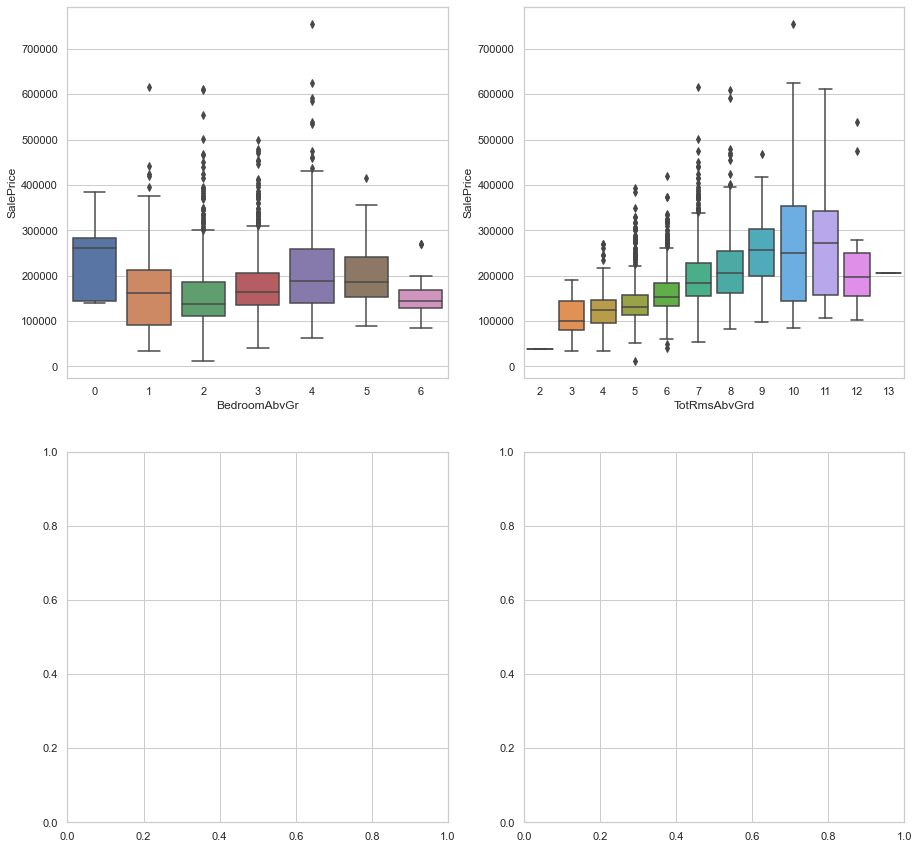

In [15]:
fig, ax = plt.subplots(2,2, figsize=(15,15))

for idx, COL in enumerate(rooms.columns):
    sns.boxplot(ax=ax[idx//2,idx%2],
            x=rooms[COL], y=housing["SalePrice"])

# Kitchen/Bathrooms

In [16]:
for name in kitchen_bath_names:
    print(kitchen_bath[name].value_counts())

0.0    1485
1.0    1065
2.0      27
3.0       1
Name: BsmtFullBath, dtype: int64
0.0    2420
1.0     156
2.0       2
Name: BsmtHalfBath, dtype: int64
2    1327
1    1196
3      45
0       8
4       4
Name: FullBath, dtype: int64
0    1622
1     940
2      18
Name: HalfBath, dtype: int64
1    2473
2     104
0       2
3       1
Name: KitchenAbvGr, dtype: int64
TA    1358
Gd    1017
Ex     142
Fa      62
Po       1
Name: KitchenQual, dtype: int64


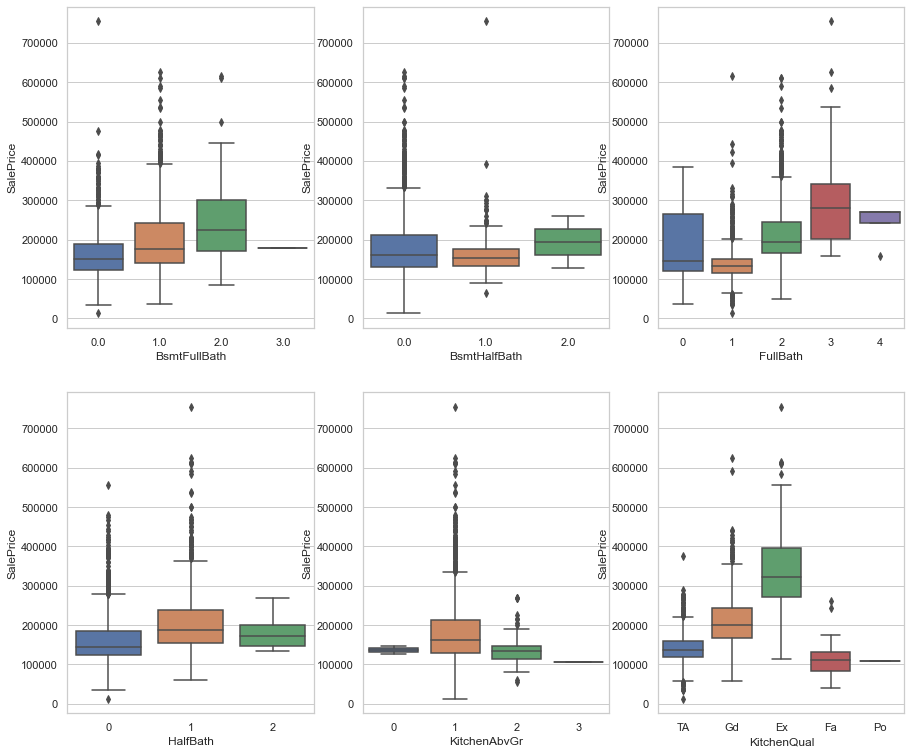

In [17]:
fig, ax = plt.subplots(2,3, figsize=(15,13))

for idx, COL in enumerate(kitchen_bath.columns):
    sns.boxplot(ax=ax[idx//3,idx%3],
            x=kitchen_bath[COL], y=housing["SalePrice"])

# Exterior/Roof

In [18]:
for name in exterior_roof_names:
    print(exterior_roof[name].value_counts())

Gable      2059
Hip         473
Gambrel      18
Flat         16
Mansard      10
Shed          4
Name: RoofStyle, dtype: int64
CompShg    2544
Tar&Grv      18
WdShake       8
WdShngl       7
Roll          1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64
VinylSd    868
HdBoard    416
MetalSd    407
Wd Sdng    385
Plywood    194
CemntBd     97
BrkFace     80
WdShing     51
Stucco      37
AsbShng     34
BrkComm      5
CBlock       2
AsphShn      2
ImStucc      1
PreCast      1
Name: Exterior1st, dtype: int64
VinylSd    856
MetalSd    404
HdBoard    380
Wd Sdng    369
Plywood    238
CmentBd     97
Wd Shng     76
BrkFace     46
Stucco      37
AsbShng     31
Brk Cmn     21
ImStucc     13
AsphShn      4
Stone        4
CBlock       3
PreCast      1
Name: Exterior2nd, dtype: int64
TA    1636
Gd     841
Ex      73
Fa      30
Name: ExterQual, dtype: int64
TA    2232
Gd     279
Fa      56
Ex      11
Po       2
Name: ExterCond, dtype: int64
CBlock    1140
PConc     1105
BrkTil     278


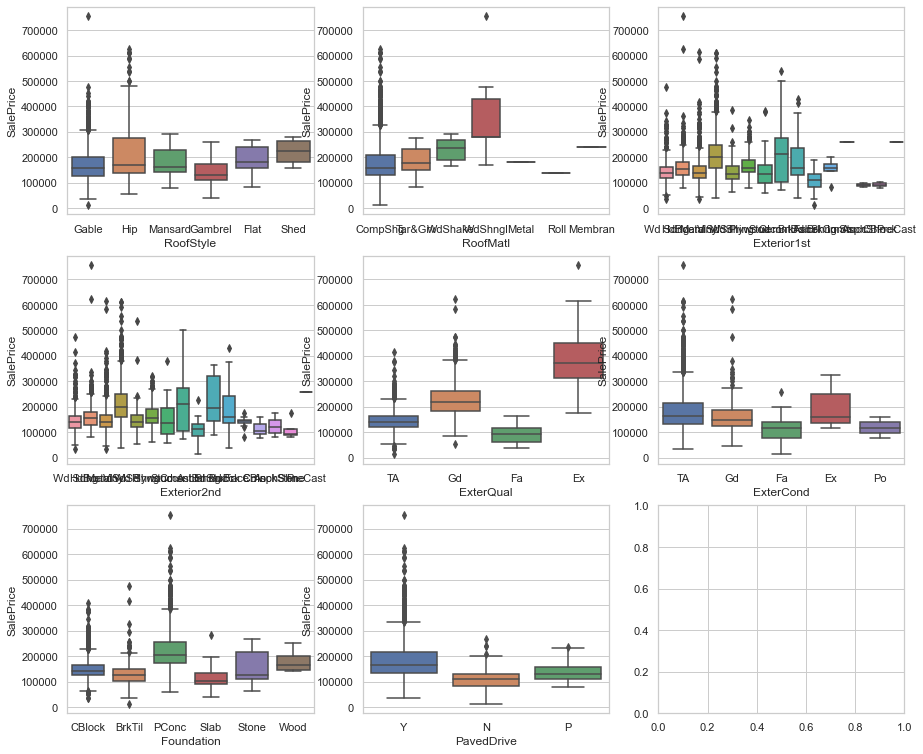

In [19]:
fig, ax = plt.subplots(3,3, figsize=(15,13))

for idx, COL in enumerate(exterior_roof.columns):
    sns.boxplot(ax=ax[idx//3,idx%3],
            x=exterior_roof[COL], y=housing["SalePrice"])

In [20]:
from scipy import stats
rvs1 = stats.norm.rvs(loc = 5.5,scale = 10,size = 500)
rvs2 = stats.norm.rvs(loc = 4.5,scale = 10,size = 500)
print(stats.ttest_ind(rvs1,rvs2))

Ttest_indResult(statistic=0.59170814638798, pvalue=0.5541800476758469)


In [21]:
rooms.columns

Index(['BedroomAbvGr', 'TotRmsAbvGrd'], dtype='object')

In [23]:
rooms.BedroomAbvGr.value_counts()

3    1409
2     656
4     349
1      99
5      40
6      20
0       7
Name: BedroomAbvGr, dtype: int64

In [32]:
rvs1 = rooms[rooms.BedroomAbvGr == 0].SalePrice

In [33]:
rvs2 = rooms[rooms.BedroomAbvGr == 1].SalePrice

In [53]:
print(stats.ttest_ind(rvs1,rvs2).pvalue)

0.1392008307548837


In [50]:
np.sort(rooms.BedroomAbvGr.unique())

array([0, 1, 2, 3, 4, 5, 6])

In [56]:
for i in np.sort(rooms.BedroomAbvGr.unique()):
    for j in np.sort(rooms.BedroomAbvGr.unique()):
        if i != j: 
            rvs1 = rooms[rooms.BedroomAbvGr == i].SalePrice
            rvs2 = rooms[rooms.BedroomAbvGr == j].SalePrice
            print(str(i) + "   " + str(j) + "   " + str(stats.ttest_ind(rvs1,rvs2).pvalue))

0   1   0.1392008307548837
0   2   0.012529168236525784
0   3   0.014446205846224618
0   4   0.570451720904481
0   5   0.29602001339071066
0   6   0.01711392609542321
1   0   0.1392008307548837
1   2   0.07889631303719376
1   3   0.7913158174219177
1   4   0.0008608804884020923
1   5   0.13291415899100892
1   6   0.5157651727255242
2   0   0.012529168236525784
2   1   0.07889631303719376
2   3   6.215818952412921e-08
2   4   3.8608137360437586e-20
2   5   0.000933451227053371
2   6   0.9907528628242774
3   0   0.014446205846224618
3   1   0.7913158174219177
3   2   6.215818952412921e-08
3   4   2.3346273808194215e-17
3   5   0.012269815746150638
3   6   0.21756252256084377
4   0   0.570451720904481
4   1   0.0008608804884020923
4   2   3.8608137360437586e-20
4   3   2.3346273808194215e-17
4   5   0.4857632922326576
4   6   0.01707189036958593
5   0   0.29602001339071066
5   1   0.13291415899100892
5   2   0.000933451227053371
5   3   0.012269815746150638
5   4   0.4857632922326576
5   

In [73]:
for i in range(7):
    for j in range(i, 7):
        if i != j:
            print(str(i) + "   " + str(j))

0   1
0   2
0   3
0   4
0   5
0   6
1   2
1   3
1   4
1   5
1   6
2   3
2   4
2   5
2   6
3   4
3   5
3   6
4   5
4   6
5   6


In [74]:
for i, vali in enumerate(np.sort(rooms.BedroomAbvGr.unique())):
    for j, valj in enumerate(np.sort(rooms.BedroomAbvGr.unique())):
        if i != j: 
            rvs1 = rooms[rooms.BedroomAbvGr == vali].SalePrice
            rvs2 = rooms[rooms.BedroomAbvGr == vali].SalePrice
            print(str(i) + "   " + str(j) + "   " + str(stats.ttest_ind(rvs1,rvs2).pvalue))

0   1   0.1392008307548837
0   2   0.012529168236525784
0   3   0.014446205846224618
0   4   0.570451720904481
0   5   0.29602001339071066
0   6   0.01711392609542321
1   0   0.1392008307548837
1   2   0.07889631303719376
1   3   0.7913158174219177
1   4   0.0008608804884020923
1   5   0.13291415899100892
1   6   0.5157651727255242
2   0   0.012529168236525784
2   1   0.07889631303719376
2   3   6.215818952412921e-08
2   4   3.8608137360437586e-20
2   5   0.000933451227053371
2   6   0.9907528628242774
3   0   0.014446205846224618
3   1   0.7913158174219177
3   2   6.215818952412921e-08
3   4   2.3346273808194215e-17
3   5   0.012269815746150638
3   6   0.21756252256084377
4   0   0.570451720904481
4   1   0.0008608804884020923
4   2   3.8608137360437586e-20
4   3   2.3346273808194215e-17
4   5   0.4857632922326576
4   6   0.01707189036958593
5   0   0.29602001339071066
5   1   0.13291415899100892
5   2   0.000933451227053371
5   3   0.012269815746150638
5   4   0.4857632922326576
5   

In [112]:
from itertools import combinations
for comb in combinations(np.sort(rooms.BedroomAbvGr.unique()), 2):
    rvs1 = rooms[rooms.BedroomAbvGr == comb[0]].SalePrice
    rvs2 = rooms[rooms.BedroomAbvGr == comb[1]].SalePrice
    pval = stats.ttest_ind(rvs1,rvs2).pvalue
    if pval > 0.7: 
        print(str(comb[0]) + "   " + str(comb[1]) + "   " + str(pval))

1   3   0.7913158174219177
2   6   0.9907528628242774


In [86]:
for comb in combinations(np.sort(rooms.BedroomAbvGr.unique()), 2):
    rvs1 = rooms[rooms.BedroomAbvGr == comb[0]].SalePrice
    rvs2 = rooms[rooms.BedroomAbvGr == comb[1]].SalePrice
    pval = stats.ttest_ind(rvs1,rvs2).pvalue
    if pval < 0.05: 
        print(str(comb[0]) + "   " + str(comb[1]) + "   " + str(pval))

0   2   0.012529168236525784
0   3   0.014446205846224618
0   6   0.01711392609542321
1   4   0.0008608804884020923
2   3   6.215818952412921e-08
2   4   3.8608137360437586e-20
2   5   0.000933451227053371
3   4   2.3346273808194215e-17
3   5   0.012269815746150638
4   6   0.01707189036958593
5   6   0.02433408304866756


In [100]:
#rooms.columns[:len(rooms.columns)-1]
rooms.columns[:-1]

Index(['BedroomAbvGr', 'TotRmsAbvGrd'], dtype='object')

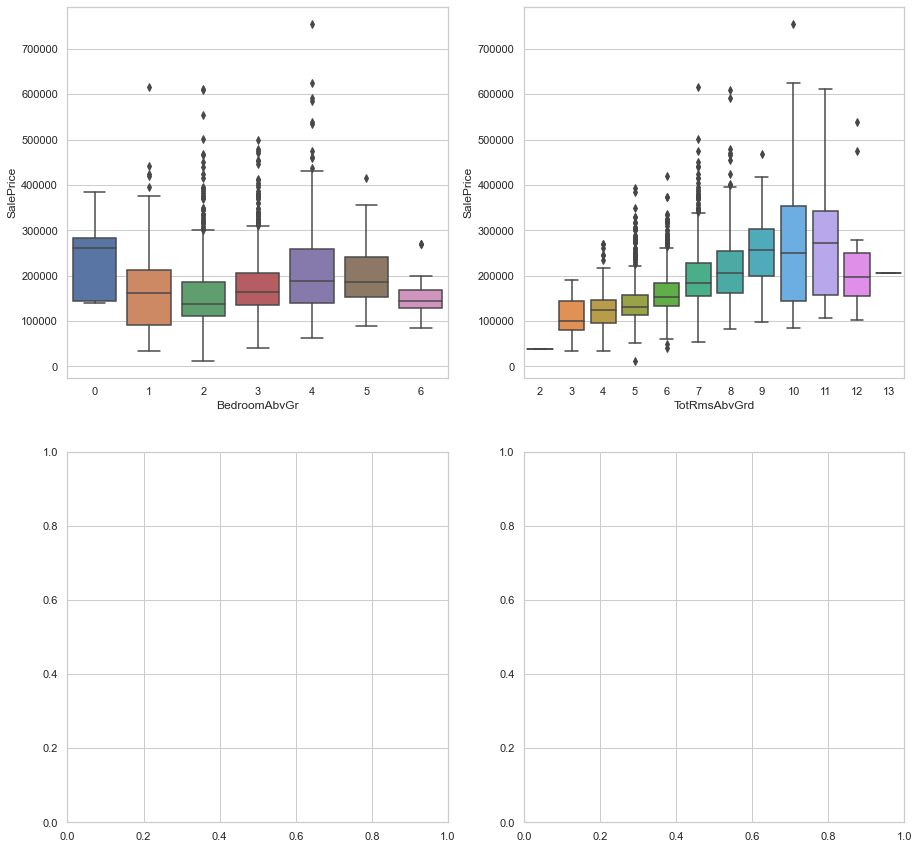

In [101]:
fig, ax = plt.subplots(2,2, figsize=(15,15))

for idx, COL in enumerate(rooms.columns[:-1]):
    sns.boxplot(ax=ax[idx//2,idx%2],
            x=rooms[COL], y=housing["SalePrice"])

In [106]:
kitchen_bath_names

['BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'KitchenQual']

In [107]:
kitchen_bath.columns

Index(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr',
       'KitchenQual'],
      dtype='object')

In [109]:
kitchen_bath.KitchenAbvGr.unique()

array([1, 2, 0, 3])

In [117]:
rooms.TotRmsAbvGrd.unique()

array([ 4,  5,  6,  7,  8,  3,  9, 12, 10, 11, 13,  2])

In [121]:
rooms_dummified = pd.get_dummies(rooms.drop('SalePrice', axis=1), 
                                 columns=['BedroomAbvGr', 'TotRmsAbvGrd'], drop_first=True)
rooms_dummified 

,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_13
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2576,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2577,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2578,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [122]:
prices = rooms[['SalePrice']]
prices

,SalePrice
0,126000
1,139500
2,124900
3,114000
4,227000
...,...
2575,121000
2576,139600
2577,145000
2578,217500


In [ ]:
#titanic_dummified = pd.concat([titanic2.drop('PClass', axis=1), U], axis=1)

In [133]:
#from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import Lasso
lasso  = Lasso()
alphas = np.linspace(0,2000,20)
lasso.set_params(normalize=False)
coefs_lasso  = []

for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(rooms_dummified, prices)  
        coefs_lasso.append(lasso.coef_)

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = rooms_dummified.columns)  
coefs_lasso.head()

<ipython-input-133-dda4c94ab8eb>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(rooms_dummified, prices)
/Users/klundquist6/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/klundquist6/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4897080576078.32, tolerance: 1451890441.6899807
  model = cd_fast.enet_coordinate_descent(


,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_13
0.000000,-69189.804565,-119246.279391,-144394.703407,-172113.468397,-219834.472414,-282822.072889,-25411.297569,30311.510547,66038.949577,96582.428230,140244.36742,171445.163672,215132.857361,258424.965447,257065.289006,246904.650753,220469.408729
105.263158,38166.242179,0.000000,-21193.782264,-42110.191413,-74901.419053,-128185.846138,-131254.261898,-100083.710855,-69885.549674,-41883.615089,-0.00000,27150.666427,67343.485496,102721.531891,94221.833054,68905.205201,0.000000
210.526316,48903.037533,17684.044345,-0.000000,-14309.222660,-34397.350945,-76034.677654,-109684.017448,-93222.520772,-66829.794329,-40522.955528,-0.00000,22971.085737,59835.108215,87556.986754,72267.397848,31718.383608,0.000000
315.789474,39703.562383,15140.231057,0.000000,-7749.789218,-15541.082794,-46285.825021,-90735.677759,-87382.067987,-64263.164099,-39195.923391,-0.00000,18985.704898,52571.611982,72863.141094,50588.989449,0.000000,0.000000
421.052632,30504.571646,12603.552829,0.000000,-2224.006430,-80.706706,-24243.150275,-71343.775897,-81096.558224,-61249.949867,-37403.382861,-0.00000,16064.886973,46703.078744,60913.269672,30979.079814,0.000000,0.000000


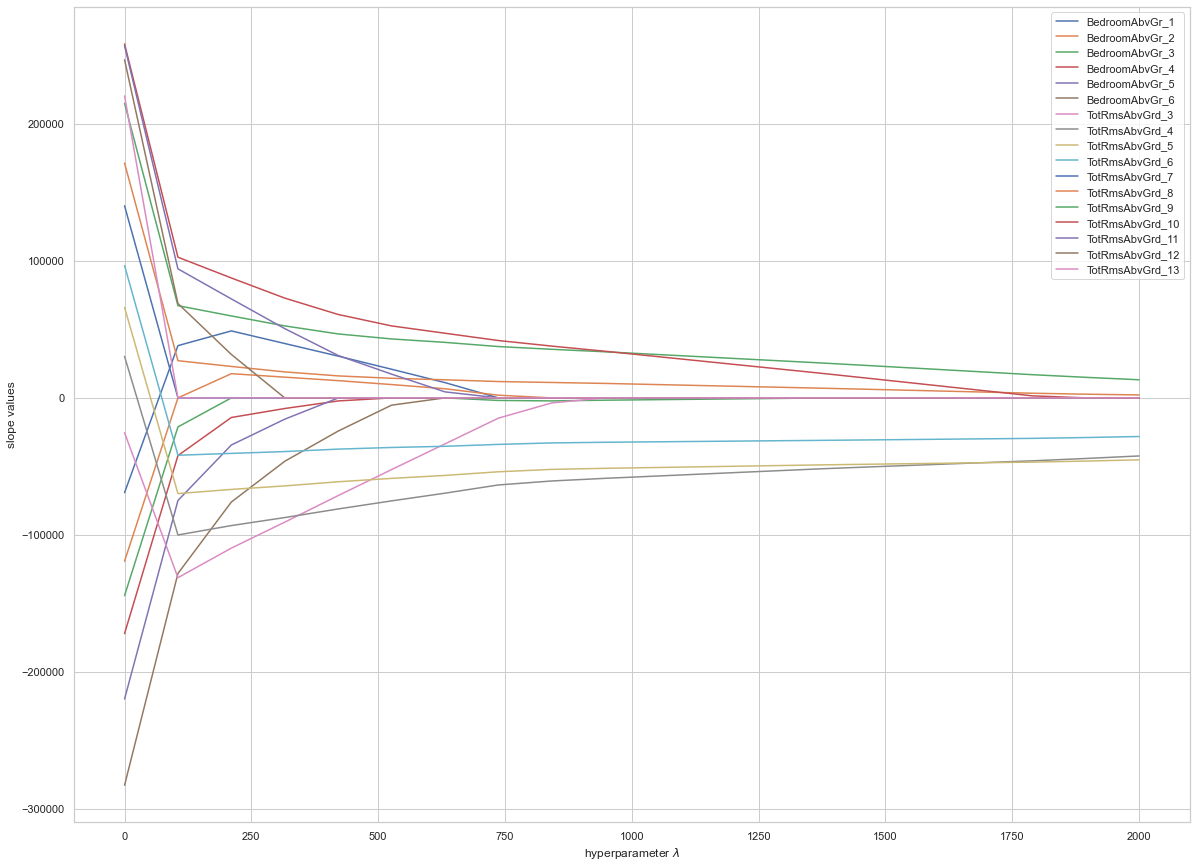

In [134]:
plt.rcParams["figure.figsize"] = (20,15)
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=1)   

In [145]:
coefs_lasso.iloc[12,:]

BedroomAbvGr_1         0.000000
BedroomAbvGr_2         0.000000
BedroomAbvGr_3      -489.220238
BedroomAbvGr_4         0.000000
BedroomAbvGr_5        -0.000000
BedroomAbvGr_6        -0.000000
TotRmsAbvGrd_3        -0.000000
TotRmsAbvGrd_4    -53564.625425
TotRmsAbvGrd_5    -49558.157188
TotRmsAbvGrd_6    -31363.377712
TotRmsAbvGrd_7         0.000000
TotRmsAbvGrd_8      7990.792449
TotRmsAbvGrd_9     27618.033580
TotRmsAbvGrd_10    22136.804890
TotRmsAbvGrd_11        0.000000
TotRmsAbvGrd_12        0.000000
TotRmsAbvGrd_13        0.000000
Name: 1263.157894736842, dtype: float64